In [1]:
import matplotlib.pyplot as plt
import numpy as np
exp_id = np.load('exp_id.npy')
exec(open("model_architecture.py").read())

net1 = torch.load('F'+ str(exp_id) +'_net1.pt')
net2 = torch.load('F'+ str(exp_id) +'_net2.pt')

In [2]:
test_data = np.load('D1_test.npy')
grad = np.zeros((len(test_data), 10+10+10+10))

net1.eval()
net2.eval()

for i, (m1, m2, m3, labels) in enumerate(DataLoader(dataset=custom_test_data, batch_size=1), 0):

    # get the inputs
    img1 = Variable(m1.to(device))
    img2 = Variable(m2.to(device))
    tab = Variable(m3.to(device))
    labels = Variable(labels.to(device))

    enc_img1 = net1(img1)
    enc_img2 = net1(img2)
    
#     enc_img1.requires_grad = True
#     enc_img2.requires_grad = True
    tab.requires_grad = True
    
    fused = torch.cat((enc_img1, enc_img2, tab), dim=1)
    
    outputs = net2(enc_img1, enc_img2, tab)
    loss = loss_fn(outputs, labels)
    prob = torch.exp(outputs[:,0])
    
    grad[i,0:10] = torch.autograd.grad(prob, enc_img1, retain_graph=True)[0].cpu().numpy()
    grad[i,10:20] = torch.autograd.grad(prob, enc_img2, retain_graph=True)[0].cpu().numpy()
    grad[i,20:40] = torch.autograd.grad(prob, tab, retain_graph=True)[0].cpu().numpy()
    

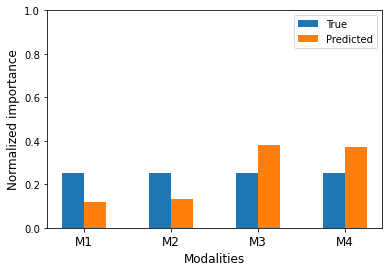

In [3]:
imp = np.mean(np.abs(grad),0 ) # average over all test for each fold

imp_m1 = np.sum(imp[0:10])/np.sum(imp)
imp_m2 = np.sum(imp[10:20])/np.sum(imp)
imp_m3 = np.sum(imp[20:30])/np.sum(imp)
imp_m4 = np.sum(imp[30:40])/np.sum(imp)

imp_m = np.array( [ imp_m1, imp_m2, imp_m3, imp_m4] ) 
imp_GT = np.load('F'+str(exp_id)+'_imp_gt.npy')

fsz=12
w = 0.25
xlabel = ['M1', 'M2','M3','M4']
plt.bar([0-w/2,1-w/2,2-w/2,3-w/2], imp_GT, width=w, capsize=2,  label='True')
plt.bar([0+w/2,1+w/2,2+w/2,3+w/2], imp_m, width=w, capsize=2,  label='Predicted')
plt.xticks([0,1,2,3],xlabel,fontsize=fsz)
plt.xlabel('Modalities',fontsize=fsz)
plt.ylabel('Normalized importance',fontsize=fsz)
plt.ylim([0,1])
plt.legend()
plt.grid

np.save('F'+str(exp_id)+'_imp_grad', imp_m)

In [14]:
import numpy as np
imp = np.array([0.09759747, 0.011989 ,  0.09325688, 0.00494357 ,0.04493135])
perm = imp/np.sum(imp)
grad = np.array([0.43025567 ,0.07907475,0.25621003,0.05166628,0.18279328])
lime = np.array([0.38978995, 0.0747075,  0.2645296,  0.04078334, 0.2301896])

agg = np.sum((perm,grad,lime),0)/3

In [15]:
print('perm',np.around(perm,3))
print('grad',np.around(grad,3))
print('lime',np.around(lime,3))
print('agg', np.around(agg,3))

perm [0.386 0.047 0.369 0.02  0.178]
grad [0.43  0.079 0.256 0.052 0.183]
lime [0.39  0.075 0.265 0.041 0.23 ]
agg [0.402 0.067 0.297 0.037 0.197]
